In [2]:
import pandas as pd


df_movies = pd.read_csv("../../_Data/ITHS_machine_learning_lab/ml-latest/movies.csv")
df_ratings = pd.read_csv("../../_Data/ITHS_machine_learning_lab/ml-latest/ratings.csv")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [21]:
import seaborn as sns

## EDA

In [10]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [18]:
df_ratings["rating"].describe()

count    2.775344e+07
mean     3.530445e+00
std      1.066353e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [27]:
df_ratings["rating"].value_counts()

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

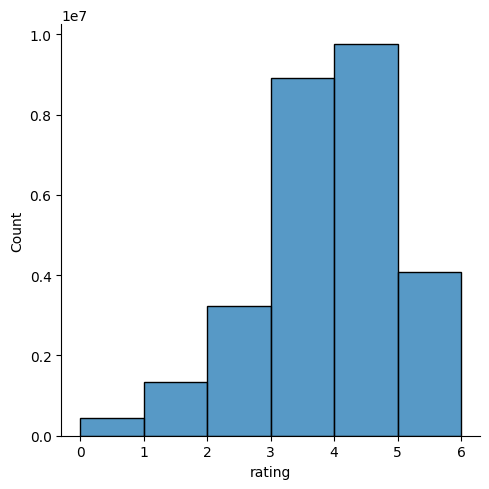

In [38]:
sns.displot(df_ratings, x = "rating", discrete=True)

In [41]:
df_movies.head().sort_values(by = "movieId")

,movieId,title,genres
4,5,Father of the Bride Part II (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
2,3,Grumpier Old Men (1995),Comedy|Romance
1,2,Jumanji (1995),Adventure|Children|Fantasy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Top 10 ratings

In [405]:
top10_id = df_ratings.groupby("movieId").count().sort_values(by = "rating", ascending=False).head(10).index

df_movies[df_movies["movieId"].isin(top10_id)]


,movieId,title,genres,years,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,[1995],1995
108,110,Braveheart (1995),Action|Drama|War,[1995],1995
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,[1977],1977
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,[1994],1994
315,318,"Shawshank Redemption, The (1994)",Crime|Drama,[1994],1994
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,[1994],1994
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,[1993],1993
523,527,Schindler's List (1993),Drama|War,[1993],1993
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,[1991],1991
2487,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,[1999],1999


In [79]:
# mean rating of top 10 movies is high
df_ratings[df_ratings["movieId"].isin(top10_id)]["rating"].describe()

count    826943.000000
mean          4.102288
std           0.939856
min           0.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [178]:

for id in top10_id:
    title = df_movies[df_movies["movieId"] == id]["title"].values[0]
    rating = df_ratings[df_ratings["movieId"] == id]["rating"].mean()

    print(f"{title}     Rating: {rating:.1f}")



Shawshank Redemption, The (1994)     Rating: 4.4
Forrest Gump (1994)     Rating: 4.1
Pulp Fiction (1994)     Rating: 4.2
Silence of the Lambs, The (1991)     Rating: 4.2
Matrix, The (1999)     Rating: 4.1
Star Wars: Episode IV - A New Hope (1977)     Rating: 4.1
Jurassic Park (1993)     Rating: 3.7
Schindler's List (1993)     Rating: 4.3
Braveheart (1995)     Rating: 4.0
Toy Story (1995)     Rating: 3.9


## Years

In [366]:
df_movies["year"] = pd.Series(df_movies["title"].str.extract(r'\((\d{4})\)', expand=False), dtype="Int64")

In [367]:
# some movies have no year in title
df_movies[df_movies["year"].isnull()]

,movieId,title,genres,years,year
10023,32930,Category 6: Day of Destruction,Action|Drama,[],<NA>
10613,40697,Babylon 5,Sci-Fi,[],<NA>
15719,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,[],<NA>
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,[],<NA>
22651,107434,Diplomatic Immunity (2009– ),Comedy,[2009],<NA>
...,...,...,...,...,...
57504,192339,The Sign of Three,(no genres listed),[],<NA>
57674,192829,Parwaaz Hai Junoon,Adventure|Children|Romance,[],<NA>
57789,193149,¿Qué te juegas?,(no genres listed),[],<NA>
57903,193443,Wall,(no genres listed),[],<NA>


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

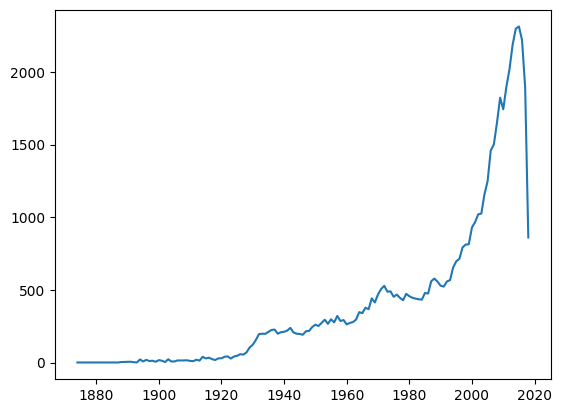

In [395]:
sns.lineplot(x=df_movies["year"].value_counts().index, y=df_movies["year"].value_counts())

## Ratings

<Axes: xlabel='movieId', ylabel='rating'>

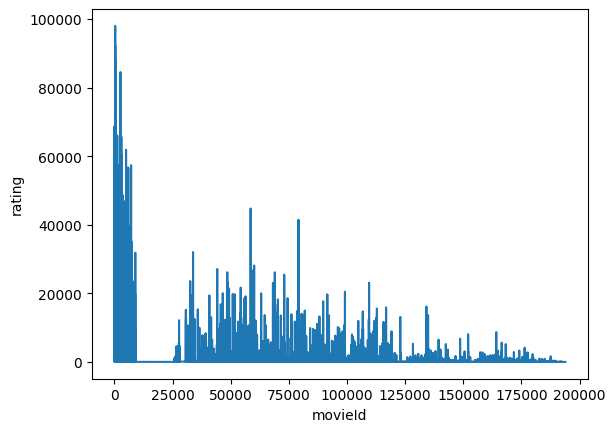

In [430]:
sorted_by_ratings = df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False)

sns.lineplot(x = sorted_by_ratings.index, y = sorted_by_ratings)

# there is a gap in movieIds for some reason

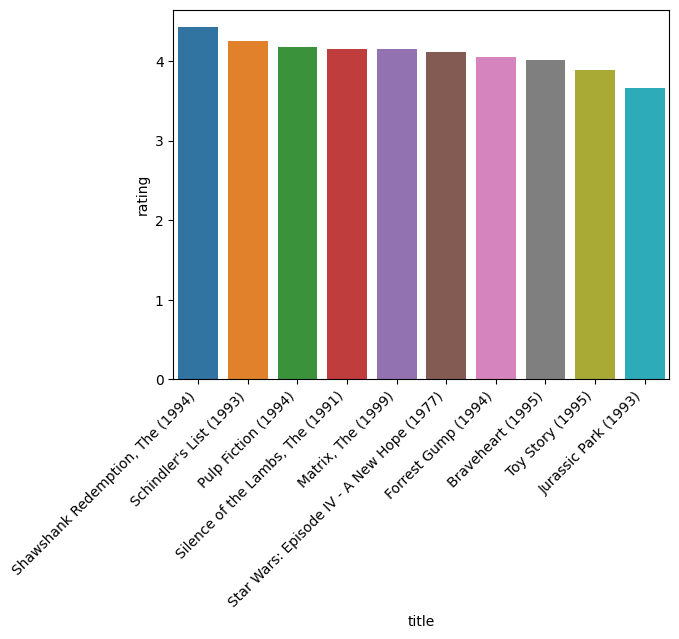

In [496]:
top10_ratings = df_ratings[df_ratings["movieId"].isin(top10_id)].groupby("movieId")["rating"].mean().reset_index().sort_values(by = "rating", ascending=False)
top10_titles = df_movies[df_movies["movieId"].isin(top10_id)].loc[:,["movieId", "title"]]

top10_df = pd.merge(top10_ratings, top10_titles)

# sns.barplot(x=top10_df["title"], y = top10_df["rating"], order=top10_ratings["movieId"].values)
sns.barplot(x=top10_df["title"], y = top10_df["rating"])
plt.xticks(rotation=45, ha='right');